In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales'].values.reshape(-1, 1)
X = data[['TV','radio','newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


In [3]:
# Linear Relationship

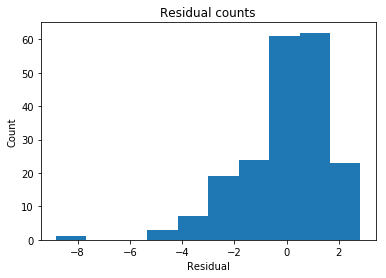

In [4]:
# Multivariate Normality
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit worrying.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

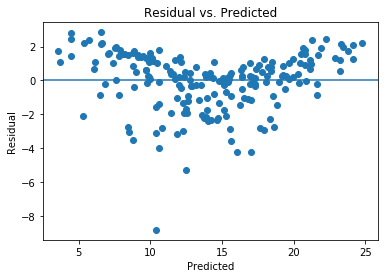

In [5]:
# Homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit worrying.

In [6]:
# Low multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,radio,newspaper
TV,1.000,0.055,0.057
radio,0.055,1.000,0.354
newspaper,0.057,0.354,1.000


In [7]:
# Fixing problems with both heteroscedasticity and multivariate non-normality

In [8]:
# Because of the bowl-shaped diagram of scedasticity, try adding the square of the variables to the model:

In [9]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [10]:
data['tv_sq']=data['TV']**2
data['radio_sq']=data['radio']**2
data['newspaper_sq']=data['newspaper']**2

In [11]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,tv_sq,radio_sq,newspaper_sq
0,1,230.100,37.800,69.200,22.100,52946.010,1428.840,4788.640
1,2,44.500,39.300,45.100,10.400,1980.250,1544.490,2034.010
2,3,17.200,45.900,69.300,9.300,295.840,2106.810,4802.490
3,4,151.500,41.300,58.500,18.500,22952.250,1705.690,3422.250
4,5,180.800,10.800,58.400,12.900,32688.640,116.640,3410.560


In [12]:
# Instantiate and fit the new model with variables squared.
regr = linear_model.LinearRegression()
Y = data['sales'].values.reshape(-1, 1)
X = data[['TV','radio','newspaper','tv_sq','radio_sq','newspaper_sq']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  7.80903298e-02   1.59536731e-01   1.01178222e-02  -1.12333566e-04
    7.00989834e-04  -1.22568818e-04]]

Intercept: 
 [ 1.41112329]

R-squared:
0.917582965777


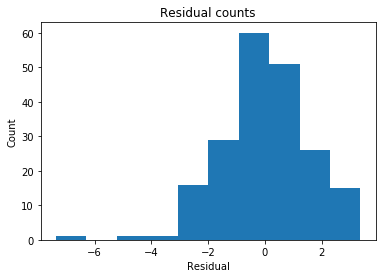

In [13]:
# Test for Multivariate Normality again:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
# This looks more normal

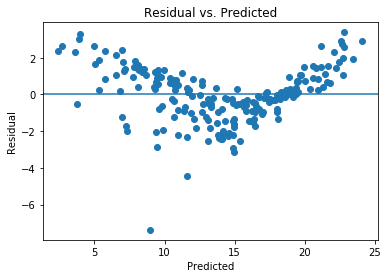

In [14]:
# Test for Homoscedasticity again:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
# Somewhat better 